# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.236173e+01     1.479495e+01
 * time: 0.0029158592224121094
     1     5.879704e+01     9.150456e+00
 * time: 0.008709907531738281
     2     5.419910e+01     1.209693e+01
 * time: 0.022182941436767578
     3     3.734247e+01     8.415189e+00
 * time: 0.04026985168457031
     4     2.769148e+01     7.167008e+00
 * time: 0.05985283851623535
     5     2.048459e+01     5.217106e+00
 * time: 0.0785369873046875
     6     1.862155e+01     5.687879e+00
 * time: 0.1454029083251953
     7     9.489889e+00     1.804982e+00
 * time: 0.1585550308227539
     8     8.300292e+00     3.130638e+00
 * time: 0.1713550090789795
     9     7.649685e+00     2.239077e+00
 * time: 0.1842799186706543
    10     7.225076e+00     2.232989e+00
 * time: 0.19573688507080078
    11     6.987681e+00     1.715431e+00
 * time: 0.20640993118286133
    12     6.806755e+00     1.176801e+00
 * time: 0.21744489669799805
    13     6.650744e+00     1.951690e+00
 * time: 

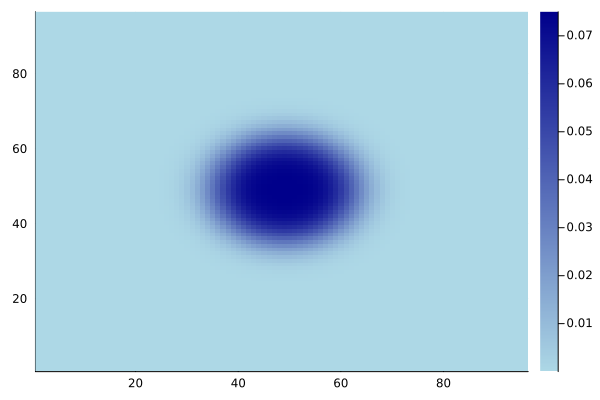

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)